In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

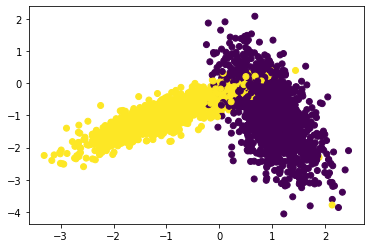

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

##**Implementing Custom RandomSearchCV**##

#Checking the Train and Test split#

In [4]:
len(X_train)

7500

In [5]:
len(X_test)

2500

#Implementing Custom RandomSearchCV#

In [12]:
from sklearn.metrics import accuracy_score

params = random.sample(range(1,50),10) #taking param_range as (1,50) and generating 10 unique values
params.sort()
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = []
    for k in tqdm(params):
      trainscores_folds = []
      testscores_folds  = []
      for j in range(0, folds):
        per_fold = int(len(x_train)/folds)
        test_indices = list(set(list(range((per_fold*j),(per_fold*(j+1)))))) #splitting numbers into groups, 2/3 of the numbers taken as test_indices
        train_indices=list(set(list(range(0,len(x_train))))-set(test_indices)) # rest of the numbers taken as train_indices

# selecting the data points based on the train_indices and test_indices
        X_train=x_train[train_indices]
        Y_train=y_train[train_indices]
        X_test=x_train[test_indices]
        Y_test=y_train[test_indices]

        classifier.n_neighbors = k
        classifier.fit(X_train,Y_train)

        Y_predicted = classifier.predict(X_test)
        testscores_folds.append(accuracy_score(Y_test, Y_predicted))

        Y_predicted = classifier.predict(X_train)
        trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
      trainscores.append(np.mean(np.array(trainscores_folds)))
      testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

#Finding Train and Test Accuracies#

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()
folds = 3

train_scores,test_scores = RandomSearchCV(X_train, y_train, neigh, params, folds)

print("train scores :",train_scores)
print("test scores :",test_scores)

100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

train scores : [1.0, 0.9595333333333333, 0.9592, 0.9589333333333334, 0.9575333333333335, 0.9571333333333333, 0.9572666666666666, 0.9575333333333332, 0.9586, 0.9581333333333334]
test scores : [0.9296000000000001, 0.9526666666666667, 0.9544, 0.9540000000000001, 0.9545333333333333, 0.9541333333333334, 0.9541333333333334, 0.9546666666666667, 0.956, 0.9558666666666666]


#hyper-parameter vs accuracy plot#

100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


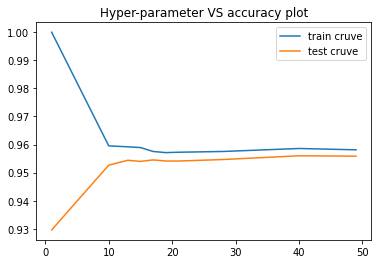

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

#Plotting the decision boundaries#

In [15]:
def plot_decision_boundary(X1, X2, y, clf):
    # Creating color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # plotting the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

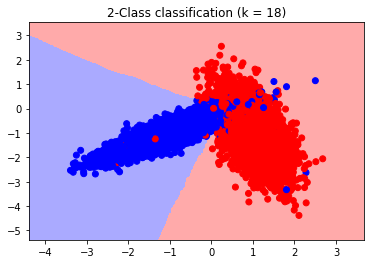

In [16]:
#As per the hyper-parameter vs accuracy plot, the best k =46 as the accuracy is the highest. Hence plotting decision boundaries with k = 46

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 18)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
